In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pandas_profiling.profile_report import ProfileReport

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
# Attribute Information
# 1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 6) ever_married: "No" or "Yes"
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 8) Residence_type: "Rural" or "Urban"
# 9) avg_glucose_level: average glucose level in blood
# 10) bmi: body mass index
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# 12) stroke: 1 if the patient had a stroke or 0 if not
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [6]:
df.shape

(5110, 12)

In [7]:
pd_report = ProfileReport(df)
pd_report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df['bmi'].mean()

28.893236911794673

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [10]:
df['bmi'].isna().sum()

0

In [11]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
gender = {'Male':0, 'Female':1, 'Other':2}
df['gender'] = df['gender'].replace(gender)

In [13]:
ever_mar = {'No':0, 'Yes':1}
df['ever_married'] = df['ever_married'].replace(ever_mar)

In [14]:
work_types = {"Private":0, "Self-employed":1, "children":2, "Govt_job":3, "Never_worked":4}
df['work_type'] = df['work_type'].replace(work_types)

In [15]:
residence = {"Urban":0, "Rural":1}
df['Residence_type'] = df['Residence_type'].replace(residence)

In [16]:
smoke = {"never smoked":0, "Unknown":1, "formerly smoked":2, "smokes":3}
df['smoking_status'] = df['smoking_status'].replace(smoke)

In [30]:
df.tail()

id  gender   age  hypertension  heart_disease  ever_married  \
5105  18234       1  80.0             1              0             1   
5106  44873       1  81.0             0              0             1   
5107  19723       1  35.0             0              0             1   
5108  37544       0  51.0             0              0             1   
5109  44679       1  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
5105          0               0              83.75  28.893237               0   
5106          1               0             125.20  40.000000               0   
5107          1               1              82.99  30.600000               0   
5108          0               1             166.29  25.600000               2   
5109          3               0              85.28  26.200000               1   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [18]:
for i in df[['gender', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'smoking_status']]:
    print(df[i].unique())

[0 1 2]
[0 1]
[1 0]
[0 1 3 2 4]
[0 1]
[2 0 3 1]


In [19]:
df['ever_married'].unique()

array([1, 0])

In [20]:
train = df.drop(['id','stroke'], axis=1)
test = df['stroke']

In [21]:
train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       1  61.0             0              0             1          1   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  
0               0             228.69  36.600000               2  
1               1             202.21  28.893237               0  
2               1             105.92  32.500000               0  
3               0             171.23  34.400000               3  
4               1             174.12  24.000000               0

In [22]:
test.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, x_test, Y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=322)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
model.score(x_test, y_test)

0.9536855838225701

In [31]:
model.predict([[1,80.0,1,0,1,0,0,83.75,28.893237,0]])

array([0])

In [32]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from six import StringIO
from IPython.display import Image
import pydotplus

In [33]:
feature_name = list(train.columns)
class_name = list(test.unique())
feature_name, class_name

(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'],
 [1, 0])

In [34]:
scaler = StandardScaler()

In [35]:
X_transform = scaler.fit_transform(train)
y = test

In [36]:
X_train, x_test, Y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=322)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()

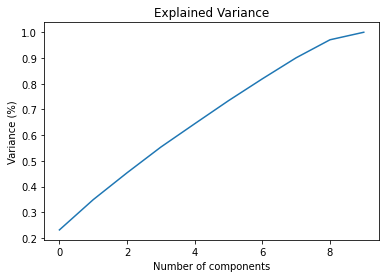

In [39]:
principle_component = pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Variance (%)")
plt.show()

In [40]:
pca = PCA(n_components=10)

In [41]:
new_data = pca.fit_transform(X_transform)

In [42]:
principal_x = pd.DataFrame(new_data, columns=["PC-"+str(i) for i in range(1, 11)])
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0     3.267753  3.086829 -0.746566  0.140636 -0.505719  2.382551  1.482491   
1     1.112149 -0.355961  1.785389 -0.033783 -0.259573  0.059625  0.581047   
2     2.400875  1.797512  0.771888 -1.213317 -1.455414  3.095214 -0.796830   
3     1.399915 -0.351903 -1.527856  0.426914  0.050512 -0.590539  1.621634   
4     2.116583  0.201854  2.768017  0.613366 -0.143113 -1.100566  0.381460   
...        ...       ...       ...       ...       ...       ...       ...   
5105  2.023000 -0.852458  1.027001  1.670520  0.404995 -0.269903 -0.288048   
5106  1.681461 -1.210202  0.299023  1.391612  0.220785  0.346033 -0.472551   
5107 -0.195527 -1.225464  1.056723 -0.371533 -0.533396  0.073397 -0.569269   
5108  0.873653  0.773094 -0.258463 -1.558097  0.446386 -0.098548  0.261201   
5109 -0.464488 -0.130421 -0.151305  1.736888 -1.026333 -0.771877 -1.027869   

          PC-8      PC-9     PC-10  
0    -1.117028  0.952066 -0.378473  
1    -1.651294 -0.976739  0.048881  
2     0.256553  1.266437  0.174932  
3    -0.938764 -0.341333 -0.304084  
4     1.236717 -1.512095  0.295287  
...        ...       ...       ...  
5105  2.547751 -0.637658  0.401285  
5106 -0.982756  0.450149  0.795572  
5107 -0.285936  0.221239 -0.654913  
5108 -0.760733 -1.304409 -0.196016  
5109 -0.652220  0.038806 -0.345810  

[5110 rows x 10 columns]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size=0.30, random_state=355)
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
model2.score(x_test, y_test)

0.918460534898891

In [54]:
count = 0
arr=np.asarray(y_test)
for i in arr:
    if i == 1:
        count+=1
count

47

In [48]:
depth = np.arange(1,100)
leaves = [1,2,4,5,10,20,30,40,80,100]
grid_search_parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth':depth,
    'min_samples_leaf':leaves,
    'splitter': ['best', 'random']
}

In [49]:
gridcv = GridSearchCV(estimator=model2, param_grid=grid_search_parameter, cv=10, n_jobs=-1)

In [50]:
gridcv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'min_samples_leaf': [1, 2, 4, 5, 10, 20, 30, 40, 80,
                                              100],
                         'splitter': ['best', 'random']})

In [51]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 47,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [52]:
gridcv.best_score_

0.9513207728079006

In [53]:
model_cv = DecisionTreeClassifier(criterion='gini', max_depth=47, min_samples_leaf=10, splitter='random')

In [54]:
model_cv.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=47, min_samples_leaf=10, splitter='random')

In [55]:
model_cv.score(x_test, y_test)

0.9536855838225701

DecisionTreeClassifier(max_depth=21, min_samples_leaf=10, splitter='random')

In [63]:
model_cv.predict([[0,3.0,0,0,0,2,1,95.12,18.0,1]])

array([0])

In [64]:
model_cv.predict([[0,67.0,0,1,1,0,0,228.69,36.600000,2]])

array([0])

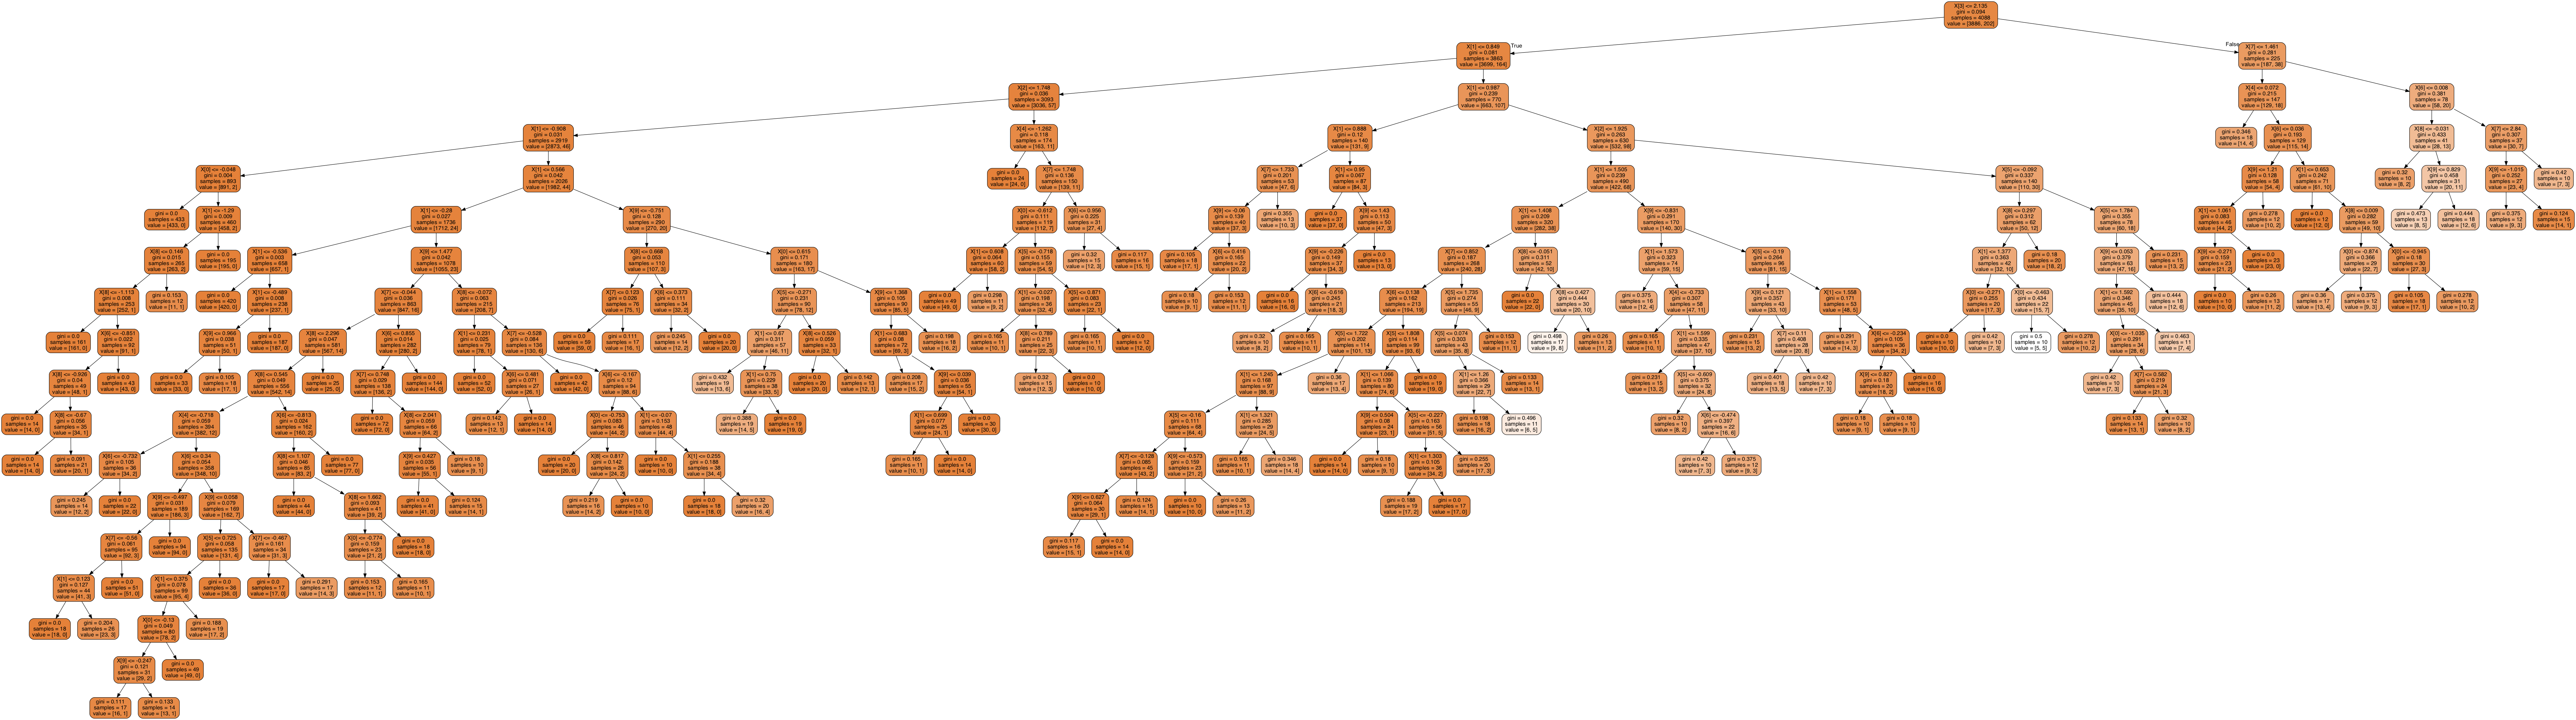

In [65]:
feature_name=list(train.columns)
class_name = list(test.unique())

dot_data = export_graphviz(model, rounded=True, filled=True)
dot_data2 = export_graphviz(model2, rounded=True, filled=True)
dot_data3 = export_graphviz(model_cv, rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('stroke_predictions.png')
Image(graph.create_png())

graph2 = pydotplus.graph_from_dot_data(dot_data2)
graph2.write_png('stroke_predictions2.png')
Image(graph2.create_png())

graph3 = pydotplus.graph_from_dot_data(dot_data3)
graph3.write_png('stroke_predictions3.png')
Image(graph3.create_png())

In [66]:
import pickle
file_name = "stroke.pickle"
pickle.dump(model, open(file_name, 'wb'))

In [67]:
test_model = pickle.load(open(file_name, 'rb'))

In [68]:
test_model.predict([[0,67.0,0,1,1,0,0,228.69,36.600000,1]])

array([1])